## Tensorboard for Tensorflow

Tensorboard is a visualization tool provided by Tensorflow to visualize the training process of your model. It is very helpful to visualize the training process, model architecture, and other important details of your model.

### What is Tensorboard?

TensorBoard is a suite of visualization tools that makes it easier to understand, debug, and optimize TensorFlow programs. It includes a suite of tools for visualizing data flow graphs, profiling, and debugging TensorFlow programs.

### Why Tensorboard?

TensorBoard provides the visualization and tooling needed for machine learning experimentation:

- Tracking and visualizing metrics such as loss and accuracy
- Visualizing the model graph (ops and layers)
- Viewing histograms of weights, biases, or other tensors as they change over time
- Projecting embeddings to a lower-dimensional space
- Displaying images, text, and audio data
- Profiling input data and model structure
- Displaying profiled data, such as input pipeline processing time, model execution time, and how long each op takes

### How to use Tensorboard?

To use Tensorboard, you need to install Tensorflow and then you can use Tensorboard to visualize the training process of your model. Here is a step by step guide on how to use Tensorboard.



In [1]:
#load libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# ignore warnings in the output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

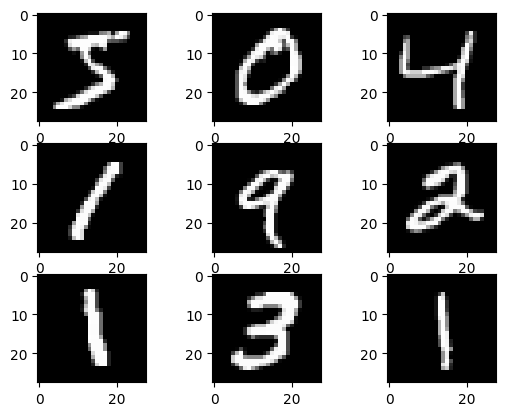

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# plot the first 9 images in the training set
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6086 - loss: 1.1230 - val_accuracy: 0.9523 - val_loss: 0.1604
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8672 - loss: 0.3919 - val_accuracy: 0.9628 - val_loss: 0.1301
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8910 - loss: 0.3228 - val_accuracy: 0.9690 - val_loss: 0.1054
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9032 - loss: 0.2933 - val_accuracy: 0.9746 - val_loss: 0.0877
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9141 - loss: 0.2608 - val_accuracy: 0.9758 - val_loss: 0.0900
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9686 - loss: 0.1141
Test accuracy: 0.9757999777793884


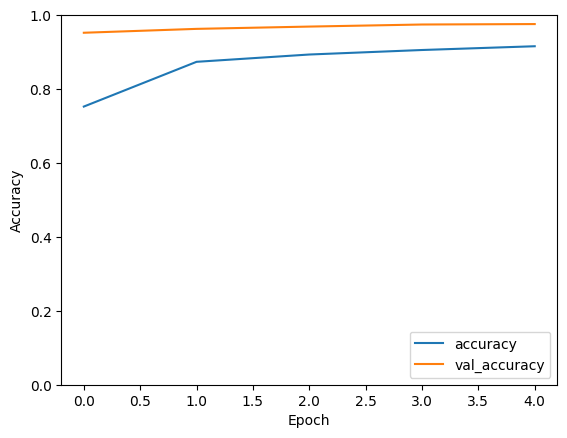

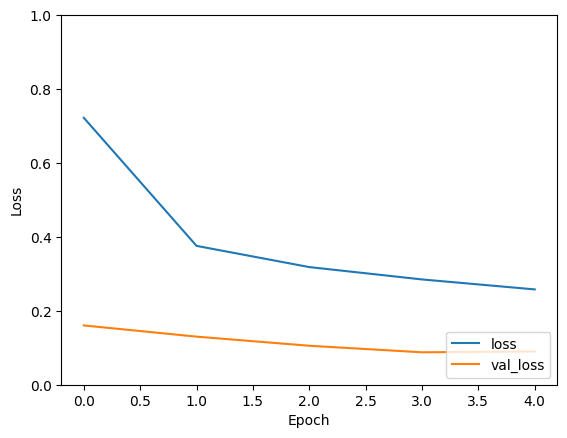

In [4]:
# compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

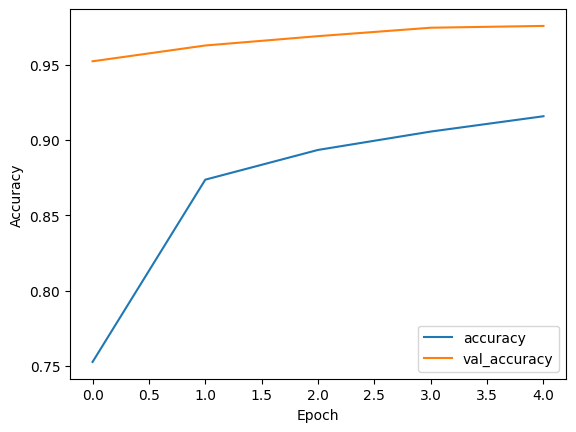

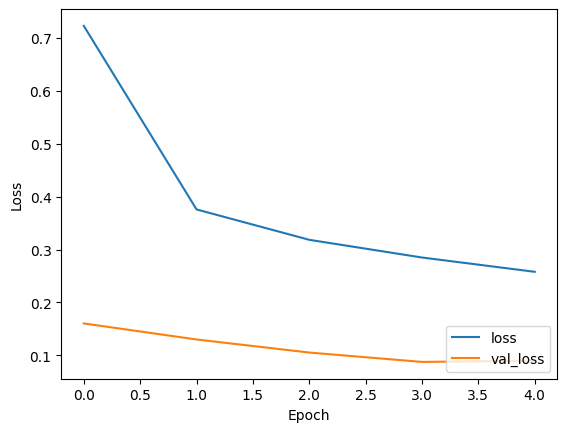

In [5]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### Lets's do it with tensorboard

In [6]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Set up TensorBoard callback:

In [7]:
# Clear any logs from previous runs
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
tensorboard_callback = TensorBoard(log_dir='./logs/adam', histogram_freq=1)

#### Train your model:

In [9]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6179 - loss: 1.0953 - val_accuracy: 0.9435 - val_loss: 0.2073
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8531 - loss: 0.4484 - val_accuracy: 0.9637 - val_loss: 0.1363
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8875 - loss: 0.3509 - val_accuracy: 0.9699 - val_loss: 0.1046
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9026 - loss: 0.3025 - val_accuracy: 0.9711 - val_loss: 0.0987
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9123 - loss: 0.2729 - val_accuracy: 0.9752 - val_loss: 0.0939


#### Run TensorBoard:

Open a terminal and navigate to your working directory. Then run:

In [10]:
# Activate inline tensorboard extension
%load_ext tensorboard

In [11]:
# run tensorboad in the notebook try using with and without %sign
%tensorboard --logdir=./logs

#### Visualize training progress:

Once TensorBoard is running, you can navigate to the Scalars tab to visualize metrics like loss and accuracy over training epochs. You can also explore other tabs like Graphs, Histograms, and Distributions to gain insights into your model's structure and behavior.

That's it! This is a basic example of how to use TensorBoard to visualize the training process of a simple neural network for rectangular data. You can further customize the TensorBoard callback to log additional information or use more advanced features as needed.

#### Hyper parameter Tuning and visualization:

In [12]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model with SGD optimizer
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard_callback = TensorBoard(log_dir='./logs/SGD', histogram_freq=1)
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])
%tensorboard --logdir=./logs

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2603 - loss: 2.0183 - val_accuracy: 0.8022 - val_loss: 0.6905
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.6577 - loss: 0.9408 - val_accuracy: 0.8959 - val_loss: 0.4121
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7259 - loss: 0.7523 - val_accuracy: 0.9269 - val_loss: 0.3198
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7556 - loss: 0.6651 - val_accuracy: 0.9392 - val_loss: 0.2475
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7965 - loss: 0.5565 - val_accuracy: 0.9534 - val_loss: 0.1870


Reusing TensorBoard on port 6007 (pid 4744), started 0:03:26 ago. (Use '!kill 4744' to kill it.)

### Hyper-Paramter Tuning and Visualization using Tensorboard

In [13]:
# Define different optimizers
optimizers = ['SGD', 'Adam']
# optimizer = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']

# Train the model with different optimizers and store each optimizer in a different callback function
for optimizer in optimizers:
    model = Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((1,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Define different batch sizes
    batch_sizes = [16, 32, 64, 128]
    
    # Train the model with different batch sizes and store each batch size in a different callback function
    for batch_size in batch_sizes:
        log_dir = f'./logs/{optimizer}_batch_size_{batch_size}'
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test,y_test), 
                  callbacks=[tensorboard_callback])

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Run TensorBoard
%tensorboard --logdir=./logs

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.4243 - loss: 1.5655 - val_accuracy: 0.9097 - val_loss: 0.3379
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.7832 - loss: 0.6133 - val_accuracy: 0.9479 - val_loss: 0.1854
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.8555 - loss: 0.4339 - val_accuracy: 0.9613 - val_loss: 0.1449
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.8765 - loss: 0.3783 - val_accuracy: 0.9664 - val_loss: 0.1181
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.8827 - loss: 0.3528 - val_accuracy: 0.9691 - val_loss: 0.1114
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8948 - loss: 0.3176 - val_accuracy: 0.9705 - val_loss: 0.1078
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8980 - loss: 0.3026 - val_accuracy: 0.9728 - val_loss: 0.1010
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8982 - loss: 0.2986 

Reusing TensorBoard on port 6007 (pid 4744), started 0:13:51 ago. (Use '!kill 4744' to kill it.)

In [16]:
# Run TensorBoard
%tensorboard --logdir=./logs

Reusing TensorBoard on port 6007 (pid 4744), started 0:29:57 ago. (Use '!kill 4744' to kill it.)

### Run Hyperparameter tuning and save the best model using TensorBoard

In [14]:
%%time
from tensorflow.keras.callbacks import ModelCheckpoint
# Import the ModelCheckpoint callback
# Define different optimizers
optimizers = ['SGD', 'Adam']
# optimizers = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']

# Train the model with different optimizers and store each optimizer in a different callback function
for optimizer in optimizers:
    model = Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((1,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Define different batch sizes
    batch_sizes = [16, 32, 64, 128]
    
    # Train the model with different batch sizes and store each batch size in a different callback function
    for batch_size in batch_sizes:
        log_dir = f'./logs/{optimizer}_batch_size_{batch_size}'
        
        # Define the ModelCheckpoint callback to save the best model based on validation accuracy
        checkpoint_callback = ModelCheckpoint(filepath=f'./models/best_model_{optimizer}_batch_size_{batch_size}.h5',
                                              monitor='val_accuracy',
                                              save_best_only=True,
                                              mode='max',
                                              verbose=1)
        
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        
        # Train the model with the callbacks
        model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test,y_test), callbacks=[tensorboard_callback, checkpoint_callback])

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Run TensorBoard
%tensorboard --logdir=./logs

Epoch 1/5
3748/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4407 - loss: 1.5448
Epoch 1: val_accuracy improved from -inf to 0.92370, saving model to ./models/best_model_SGD_batch_size_16.h5


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.4408 - loss: 1.5444 - val_accuracy: 0.9237 - val_loss: 0.2691
Epoch 2/5
3743/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8349 - loss: 0.4907
Epoch 2: val_accuracy improved from 0.92370 to 0.95150, saving model to ./models/best_model_SGD_batch_size_16.h5


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.8350 - loss: 0.4907 - val_accuracy: 0.9515 - val_loss: 0.1663
Epoch 3/5
3746/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8646 - loss: 0.3986
Epoch 3: val_accuracy improved from 0.95150 to 0.96270, saving model to ./models/best_model_SGD_batch_size_16.h5


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8646 - loss: 0.3986 - val_accuracy: 0.9627 - val_loss: 0.1302
Epoch 4/5
3743/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8829 - loss: 0.3477
Epoch 4: val_accuracy improved from 0.96270 to 0.96590, saving model to ./models/best_model_SGD_batch_size_16.h5


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.8829 - loss: 0.3477 - val_accuracy: 0.9659 - val_loss: 0.1131
Epoch 5/5
3749/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8908 - loss: 0.3153
Epoch 5: val_accuracy improved from 0.96590 to 0.97120, saving model to ./models/best_model_SGD_batch_size_16.h5


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8908 - loss: 0.3153 - val_accuracy: 0.9712 - val_loss: 0.1020
Epoch 1/5
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9059 - loss: 0.2782
Epoch 1: val_accuracy improved from -inf to 0.97560, saving model to ./models/best_model_SGD_batch_size_32.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9059 - loss: 0.2782 - val_accuracy: 0.9756 - val_loss: 0.0861
Epoch 2/5
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9093 - loss: 0.2627
Epoch 2: val_accuracy did not improve from 0.97560
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9093 - loss: 0.2627 - val_accuracy: 0.9743 - val_loss: 0.0822
Epoch 3/5
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9079 - loss: 0.2579
Epoch 3: val_accuracy improved from 0.97560 to 0.97720, saving model to ./models/best_model_SGD_batch_size_32.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9079 - loss: 0.2579 - val_accuracy: 0.9772 - val_loss: 0.0757
Epoch 4/5
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9145 - loss: 0.2387
Epoch 4: val_accuracy improved from 0.97720 to 0.97780, saving model to ./models/best_model_SGD_batch_size_32.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9145 - loss: 0.2387 - val_accuracy: 0.9778 - val_loss: 0.0729
Epoch 5/5
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9143 - loss: 0.2363
Epoch 5: val_accuracy improved from 0.97780 to 0.97830, saving model to ./models/best_model_SGD_batch_size_32.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9143 - loss: 0.2363 - val_accuracy: 0.9783 - val_loss: 0.0723
Epoch 1/5
933/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9199 - loss: 0.2264
Epoch 1: val_accuracy improved from -inf to 0.97870, saving model to ./models/best_model_SGD_batch_size_64.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9199 - loss: 0.2264 - val_accuracy: 0.9787 - val_loss: 0.0673
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9185 - loss: 0.2226
Epoch 2: val_accuracy improved from 0.97870 to 0.97880, saving model to ./models/best_model_SGD_batch_size_64.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9185 - loss: 0.2226 - val_accuracy: 0.9788 - val_loss: 0.0687
Epoch 3/5
932/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9202 - loss: 0.2225
Epoch 3: val_accuracy improved from 0.97880 to 0.97890, saving model to ./models/best_model_SGD_batch_size_64.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9202 - loss: 0.2225 - val_accuracy: 0.9789 - val_loss: 0.0683
Epoch 4/5
933/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9236 - loss: 0.2129
Epoch 4: val_accuracy improved from 0.97890 to 0.98010, saving model to ./models/best_model_SGD_batch_size_64.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9236 - loss: 0.2130 - val_accuracy: 0.9801 - val_loss: 0.0654
Epoch 5/5
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9237 - loss: 0.2132
Epoch 5: val_accuracy did not improve from 0.98010
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9237 - loss: 0.2132 - val_accuracy: 0.9794 - val_loss: 0.0659
Epoch 1/5
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9224 - loss: 0.2094
Epoch 1: val_accuracy improved from -inf to 0.97920, saving model to ./models/best_model_SGD_batch_size_128.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9224 - loss: 0.2094 - val_accuracy: 0.9792 - val_loss: 0.0667
Epoch 2/5
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9238 - loss: 0.2112
Epoch 2: val_accuracy improved from 0.97920 to 0.97940, saving model to ./models/best_model_SGD_batch_size_128.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9238 - loss: 0.2112 - val_accuracy: 0.9794 - val_loss: 0.0672
Epoch 3/5
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9220 - loss: 0.2147
Epoch 3: val_accuracy improved from 0.97940 to 0.98030, saving model to ./models/best_model_SGD_batch_size_128.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9220 - loss: 0.2146 - val_accuracy: 0.9803 - val_loss: 0.0640
Epoch 4/5
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9284 - loss: 0.2040
Epoch 4: val_accuracy did not improve from 0.98030
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9284 - loss: 0.2040 - val_accuracy: 0.9800 - val_loss: 0.0646
Epoch 5/5
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9255 - loss: 0.2063
Epoch 5: val_accuracy did not improve from 0.98030
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9255 - loss: 0.2063 - val_accuracy: 0.9799 - val_loss: 0.0642
Epoch 1/5
3749/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5787 - loss: 1.1648
Epoch 1: val_accuracy improved from -inf to 0.94420, saving model to ./models/best_model_Adam_batch_size_16.h5


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.5788 - loss: 1.1646 - val_accuracy: 0.9442 - val_loss: 0.2203
Epoch 2/5
3744/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8589 - loss: 0.4461
Epoch 2: val_accuracy improved from 0.94420 to 0.96670, saving model to ./models/best_model_Adam_batch_size_16.h5


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.8589 - loss: 0.4461 - val_accuracy: 0.9667 - val_loss: 0.1296
Epoch 3/5
3749/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8955 - loss: 0.3446
Epoch 3: val_accuracy improved from 0.96670 to 0.97620, saving model to ./models/best_model_Adam_batch_size_16.h5


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8955 - loss: 0.3446 - val_accuracy: 0.9762 - val_loss: 0.0920
Epoch 4/5
3746/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9142 - loss: 0.2795
Epoch 4: val_accuracy did not improve from 0.97620
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9142 - loss: 0.2795 - val_accuracy: 0.9756 - val_loss: 0.0906
Epoch 5/5
3745/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9194 - loss: 0.2582
Epoch 5: val_accuracy improved from 0.97620 to 0.97930, saving model to ./models/best_model_Adam_batch_size_16.h5


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9194 - loss: 0.2582 - val_accuracy: 0.9793 - val_loss: 0.0782
Epoch 1/5
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9244 - loss: 0.2368
Epoch 1: val_accuracy improved from -inf to 0.98200, saving model to ./models/best_model_Adam_batch_size_32.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9244 - loss: 0.2368 - val_accuracy: 0.9820 - val_loss: 0.0733
Epoch 2/5
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9259 - loss: 0.2336
Epoch 2: val_accuracy did not improve from 0.98200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9259 - loss: 0.2336 - val_accuracy: 0.9806 - val_loss: 0.0756
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9278 - loss: 0.2258
Epoch 3: val_accuracy improved from 0.98200 to 0.98230, saving model to ./models/best_model_Adam_batch_size_32.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9278 - loss: 0.2258 - val_accuracy: 0.9823 - val_loss: 0.0717
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9282 - loss: 0.2253
Epoch 4: val_accuracy improved from 0.98230 to 0.98290, saving model to ./models/best_model_Adam_batch_size_32.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9282 - loss: 0.2253 - val_accuracy: 0.9829 - val_loss: 0.0737
Epoch 5/5
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9334 - loss: 0.2085
Epoch 5: val_accuracy did not improve from 0.98290
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9334 - loss: 0.2085 - val_accuracy: 0.9807 - val_loss: 0.0755
Epoch 1/5
932/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9339 - loss: 0.2071
Epoch 1: val_accuracy improved from -inf to 0.98290, saving model to ./models/best_model_Adam_batch_size_64.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9339 - loss: 0.2071 - val_accuracy: 0.9829 - val_loss: 0.0732
Epoch 2/5
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9361 - loss: 0.2019
Epoch 2: val_accuracy improved from 0.98290 to 0.98420, saving model to ./models/best_model_Adam_batch_size_64.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9361 - loss: 0.2019 - val_accuracy: 0.9842 - val_loss: 0.0703
Epoch 3/5
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9347 - loss: 0.2044
Epoch 3: val_accuracy improved from 0.98420 to 0.98440, saving model to ./models/best_model_Adam_batch_size_64.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9347 - loss: 0.2044 - val_accuracy: 0.9844 - val_loss: 0.0699
Epoch 4/5
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9367 - loss: 0.1968
Epoch 4: val_accuracy did not improve from 0.98440
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9366 - loss: 0.1968 - val_accuracy: 0.9834 - val_loss: 0.0699
Epoch 5/5
932/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9370 - loss: 0.1982
Epoch 5: val_accuracy did not improve from 0.98440
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9370 - loss: 0.1982 - val_accuracy: 0.9833 - val_loss: 0.0752
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9372 - loss: 0.1934
Epoch 1: val_accuracy improved from -inf to 0.98410, saving model to ./models/best_model_Adam_batch_size_128.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9372 - loss: 0.1934 - val_accuracy: 0.9841 - val_loss: 0.0696
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9398 - loss: 0.1840
Epoch 2: val_accuracy did not improve from 0.98410
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9398 - loss: 0.1840 - val_accuracy: 0.9838 - val_loss: 0.0692
Epoch 3/5
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9384 - loss: 0.1892
Epoch 3: val_accuracy improved from 0.98410 to 0.98550, saving model to ./models/best_model_Adam_batch_size_128.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9384 - loss: 0.1892 - val_accuracy: 0.9855 - val_loss: 0.0667
Epoch 4/5
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9404 - loss: 0.1873
Epoch 4: val_accuracy did not improve from 0.98550
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9404 - loss: 0.1873 - val_accuracy: 0.9825 - val_loss: 0.0736
Epoch 5/5
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9386 - loss: 0.1907
Epoch 5: val_accuracy did not improve from 0.98550
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9386 - loss: 0.1907 - val_accuracy: 0.9845 - val_loss: 0.0715
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 4744), started 0:26:53 ago. (Use '!kill 4744' to kill it.)

CPU times: total: 2min 48s
Wall time: 8min 50s


In [15]:
%tensorboard --logdir=./logs

Reusing TensorBoard on port 6007 (pid 4744), started 0:28:59 ago. (Use '!kill 4744' to kill it.)

In [17]:
%tensorboard --logdir=./logs

Reusing TensorBoard on port 6007 (pid 4744), started 0:31:21 ago. (Use '!kill 4744' to kill it.)